In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
import os
import logging

# Suppress TensorFlow and Mediapipe logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses TensorFlow logs (0=ALL, 1=WARNING, 2=ERROR, 3=FATAL)
logging.getLogger('absl').setLevel(logging.ERROR)  # Suppress absl logging

In [3]:
import logging

logging.getLogger('absl').setLevel(logging.ERROR)  # Suppress Mediapipe logs


In [4]:
import warnings

# Ignore specific warnings
warnings.filterwarnings('ignore', category=UserWarning)  # Example: Ignore UserWarning

In [5]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1737977040.649230  479336 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1737977040.740629  479665 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737977040.792785  479668 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


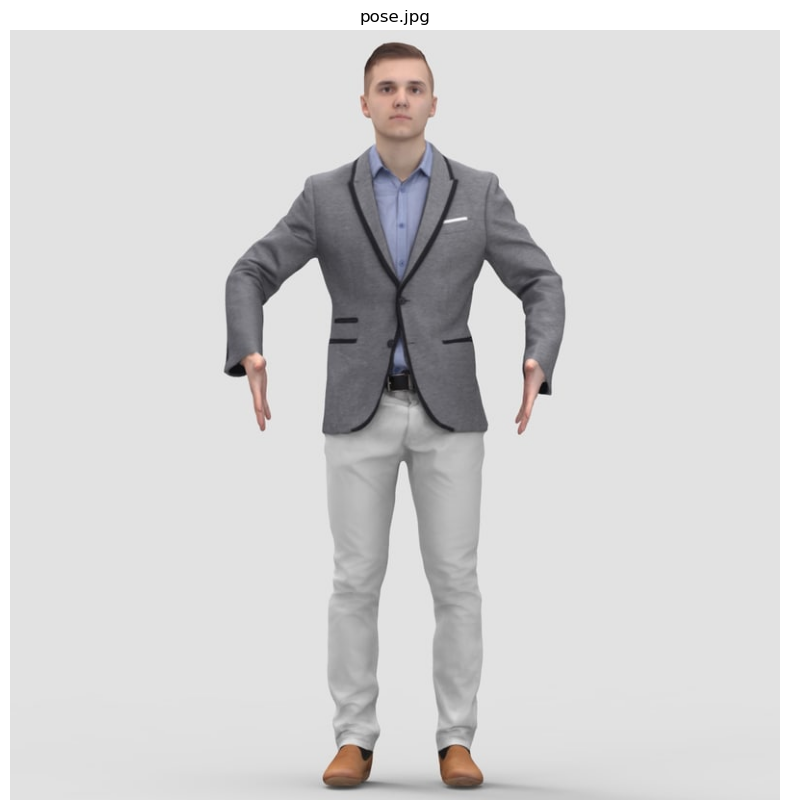

In [6]:
# Read an image from the specified path.
sample_img = cv2.imread('pose.jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("pose.jpg");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [7]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 


NOSE:
x: 0.508419275
y: 0.0980249345
z: -0.509518564
visibility: 0.999982715

LEFT_EYE_INNER:
x: 0.521829665
y: 0.0797207505
z: -0.476227254
visibility: 0.99993372



W0000 00:00:1737977041.026600  479667 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [8]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 406.7354202270508
y: 78.41994762420654
z: -407.6148509979248
visibility: 0.9999827146530151

LEFT_EYE_INNER:
x: 417.46373176574707
y: 63.77660036087036
z: -380.98180294036865
visibility: 0.9999337196350098



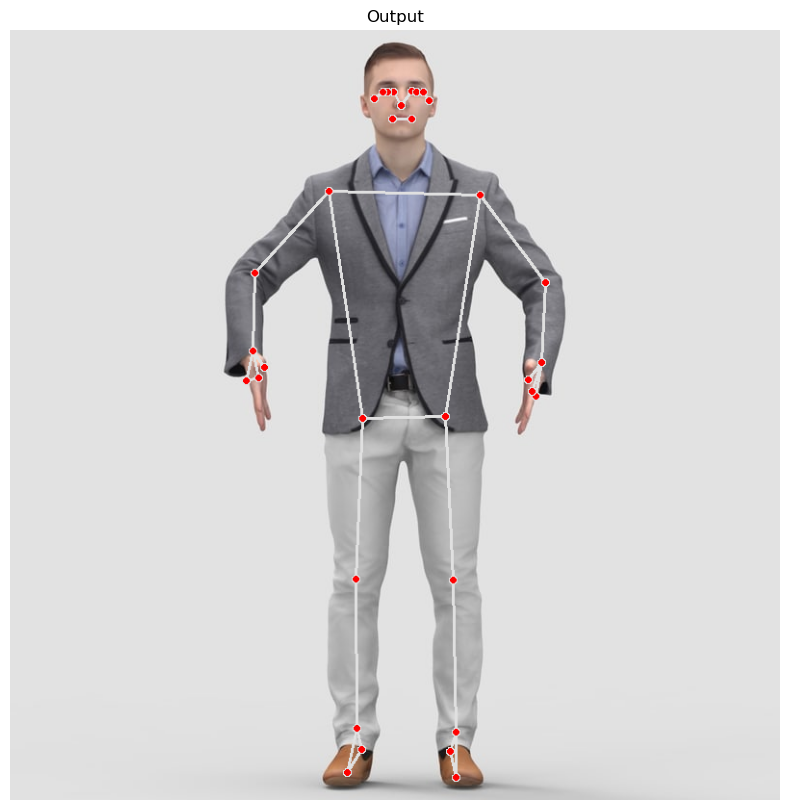

In [9]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

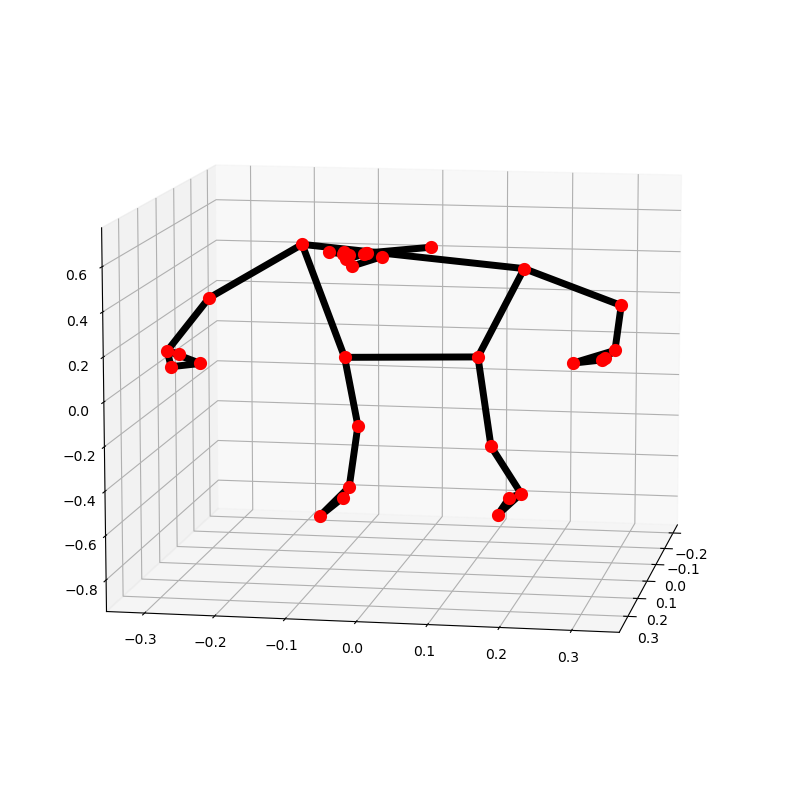

In [10]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [11]:
def detectPose(image, pose, display=True):
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

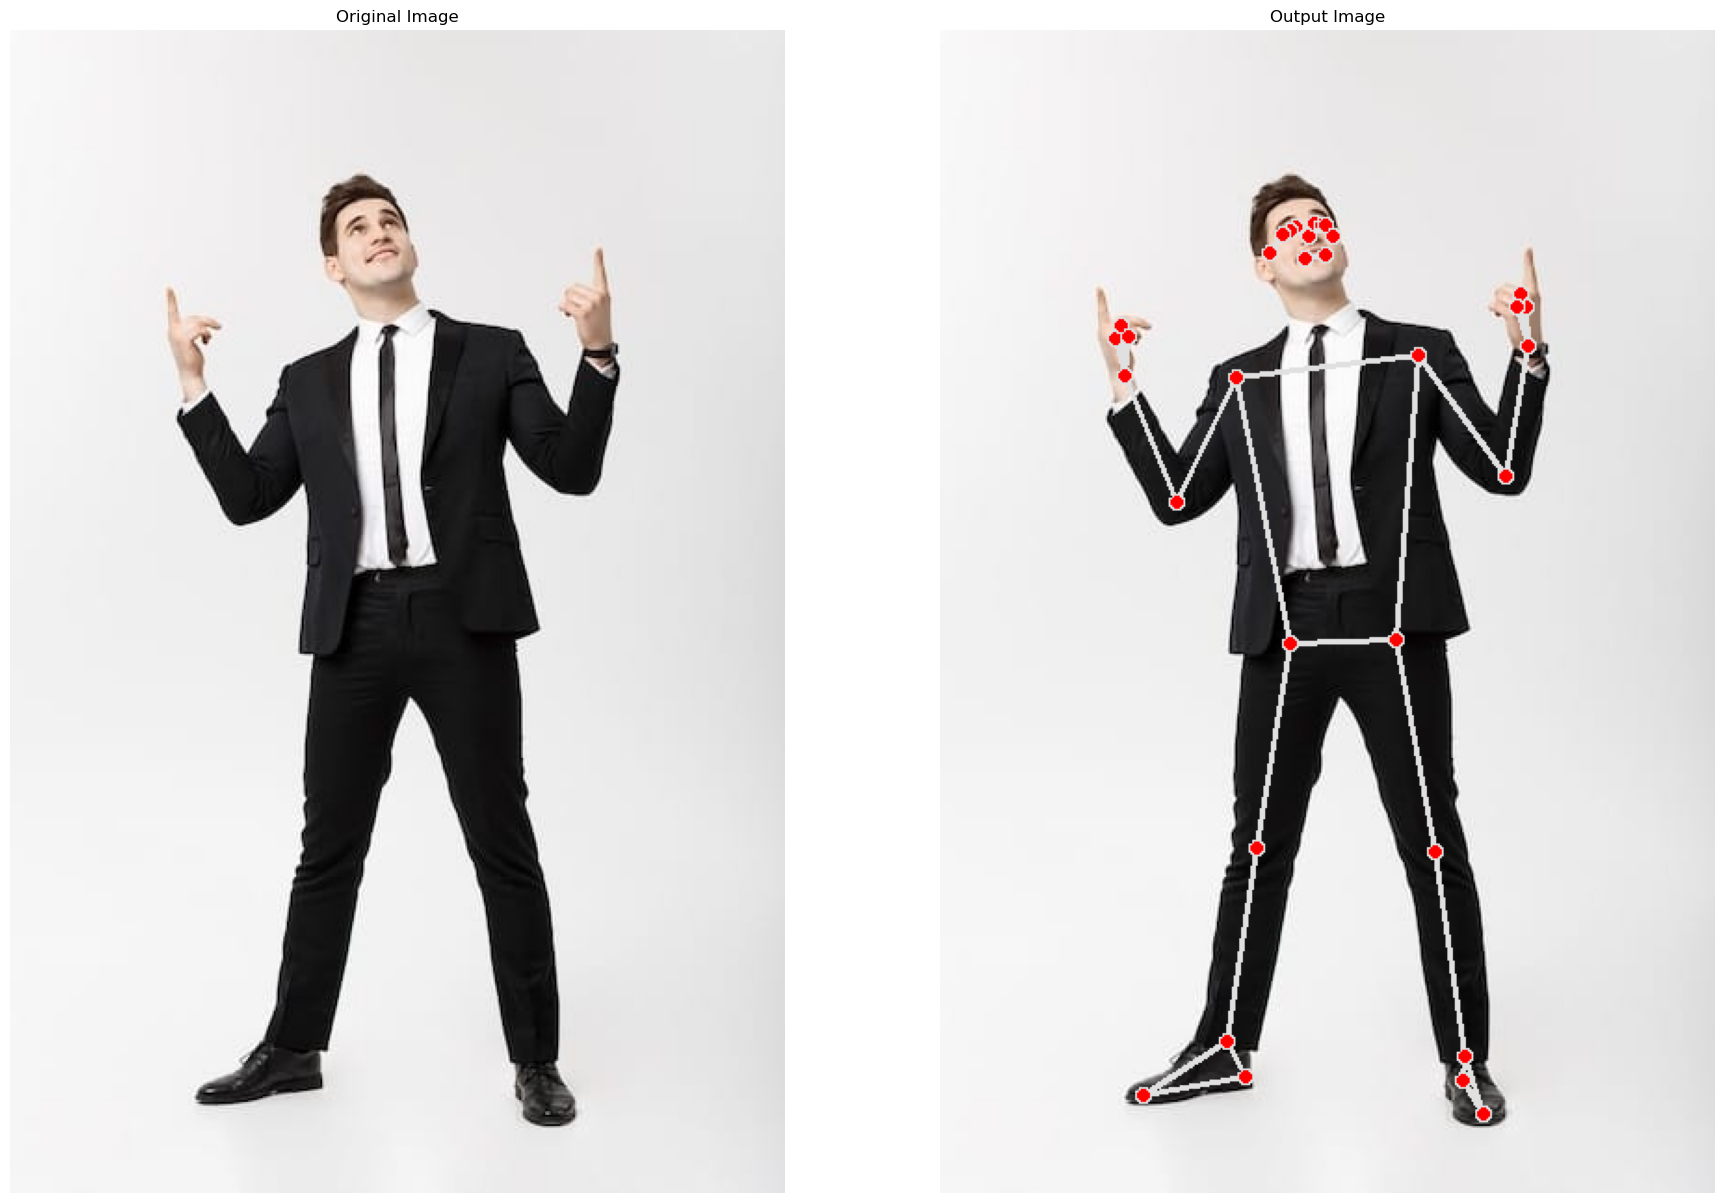

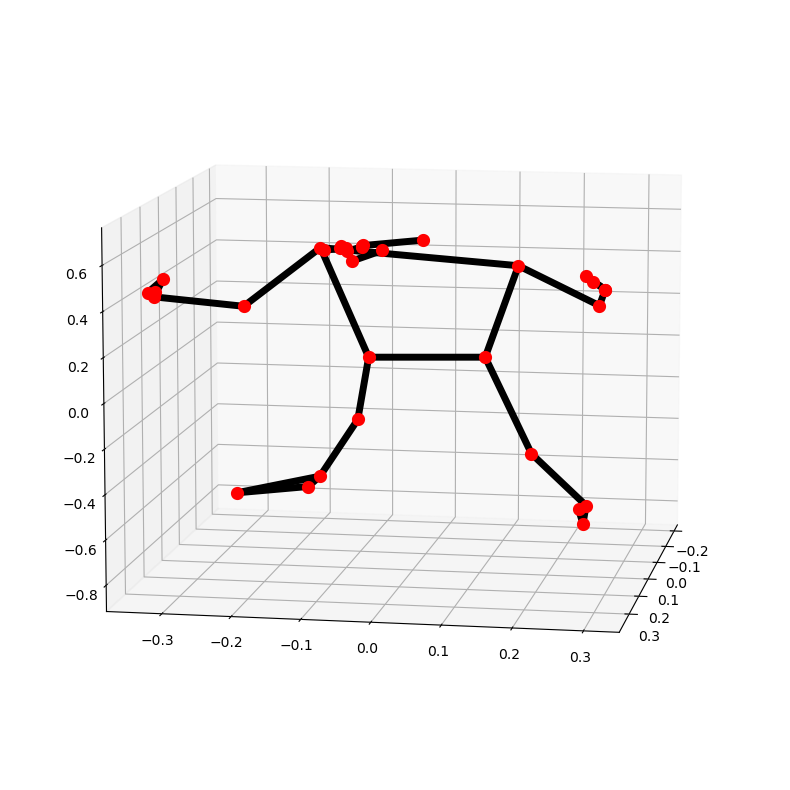

In [12]:
# Read another sample image and perform pose detection on it.
image = cv2.imread('poses.jpeg')
detectPose(image, pose, display=True)

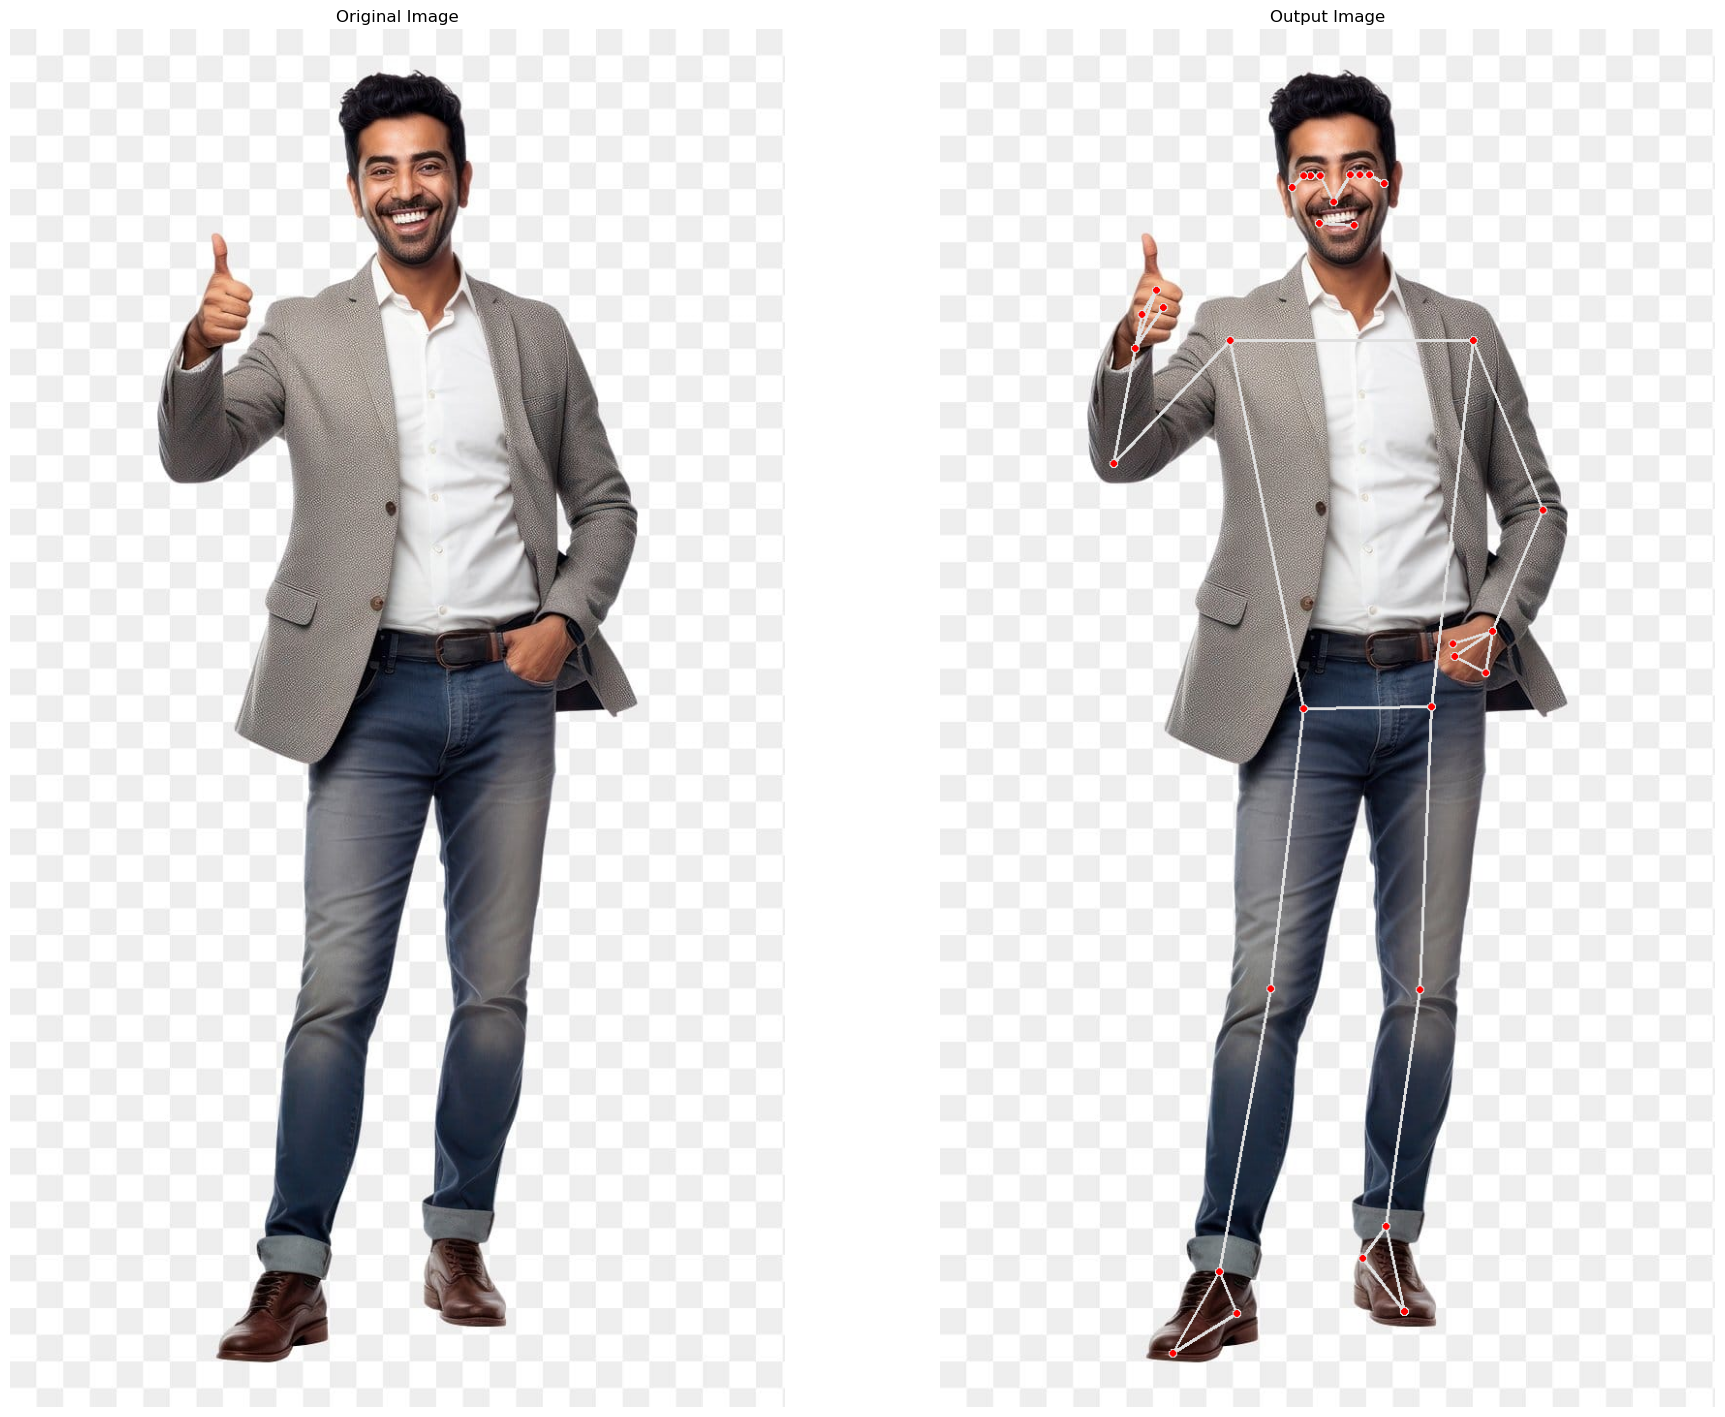

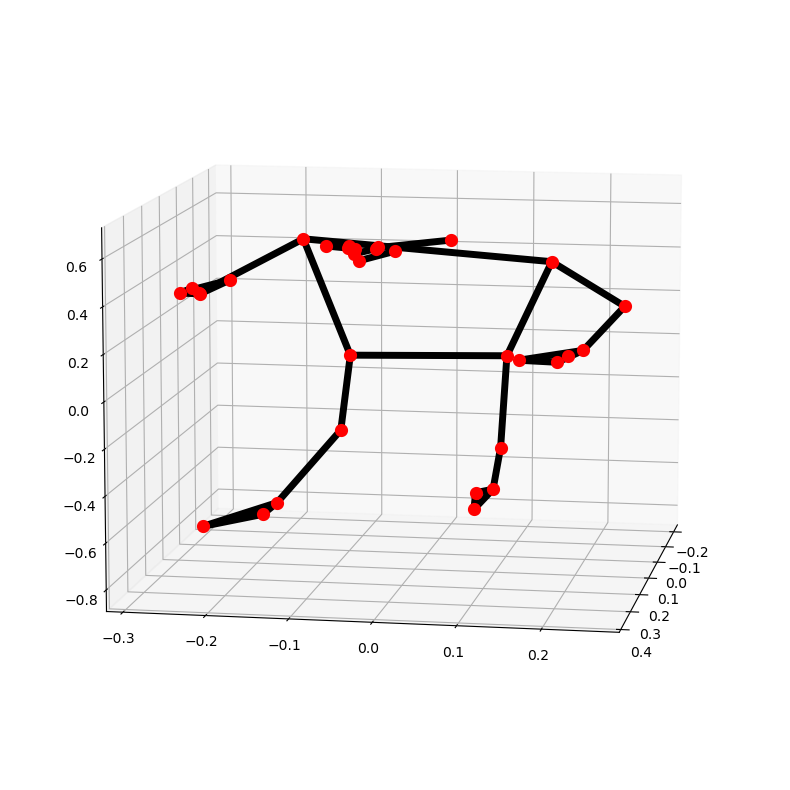

In [13]:
# Read another sample image and perform pose detection on it.
image = cv2.imread('photo_1.jpeg')
detectPose(image, pose, display=True)

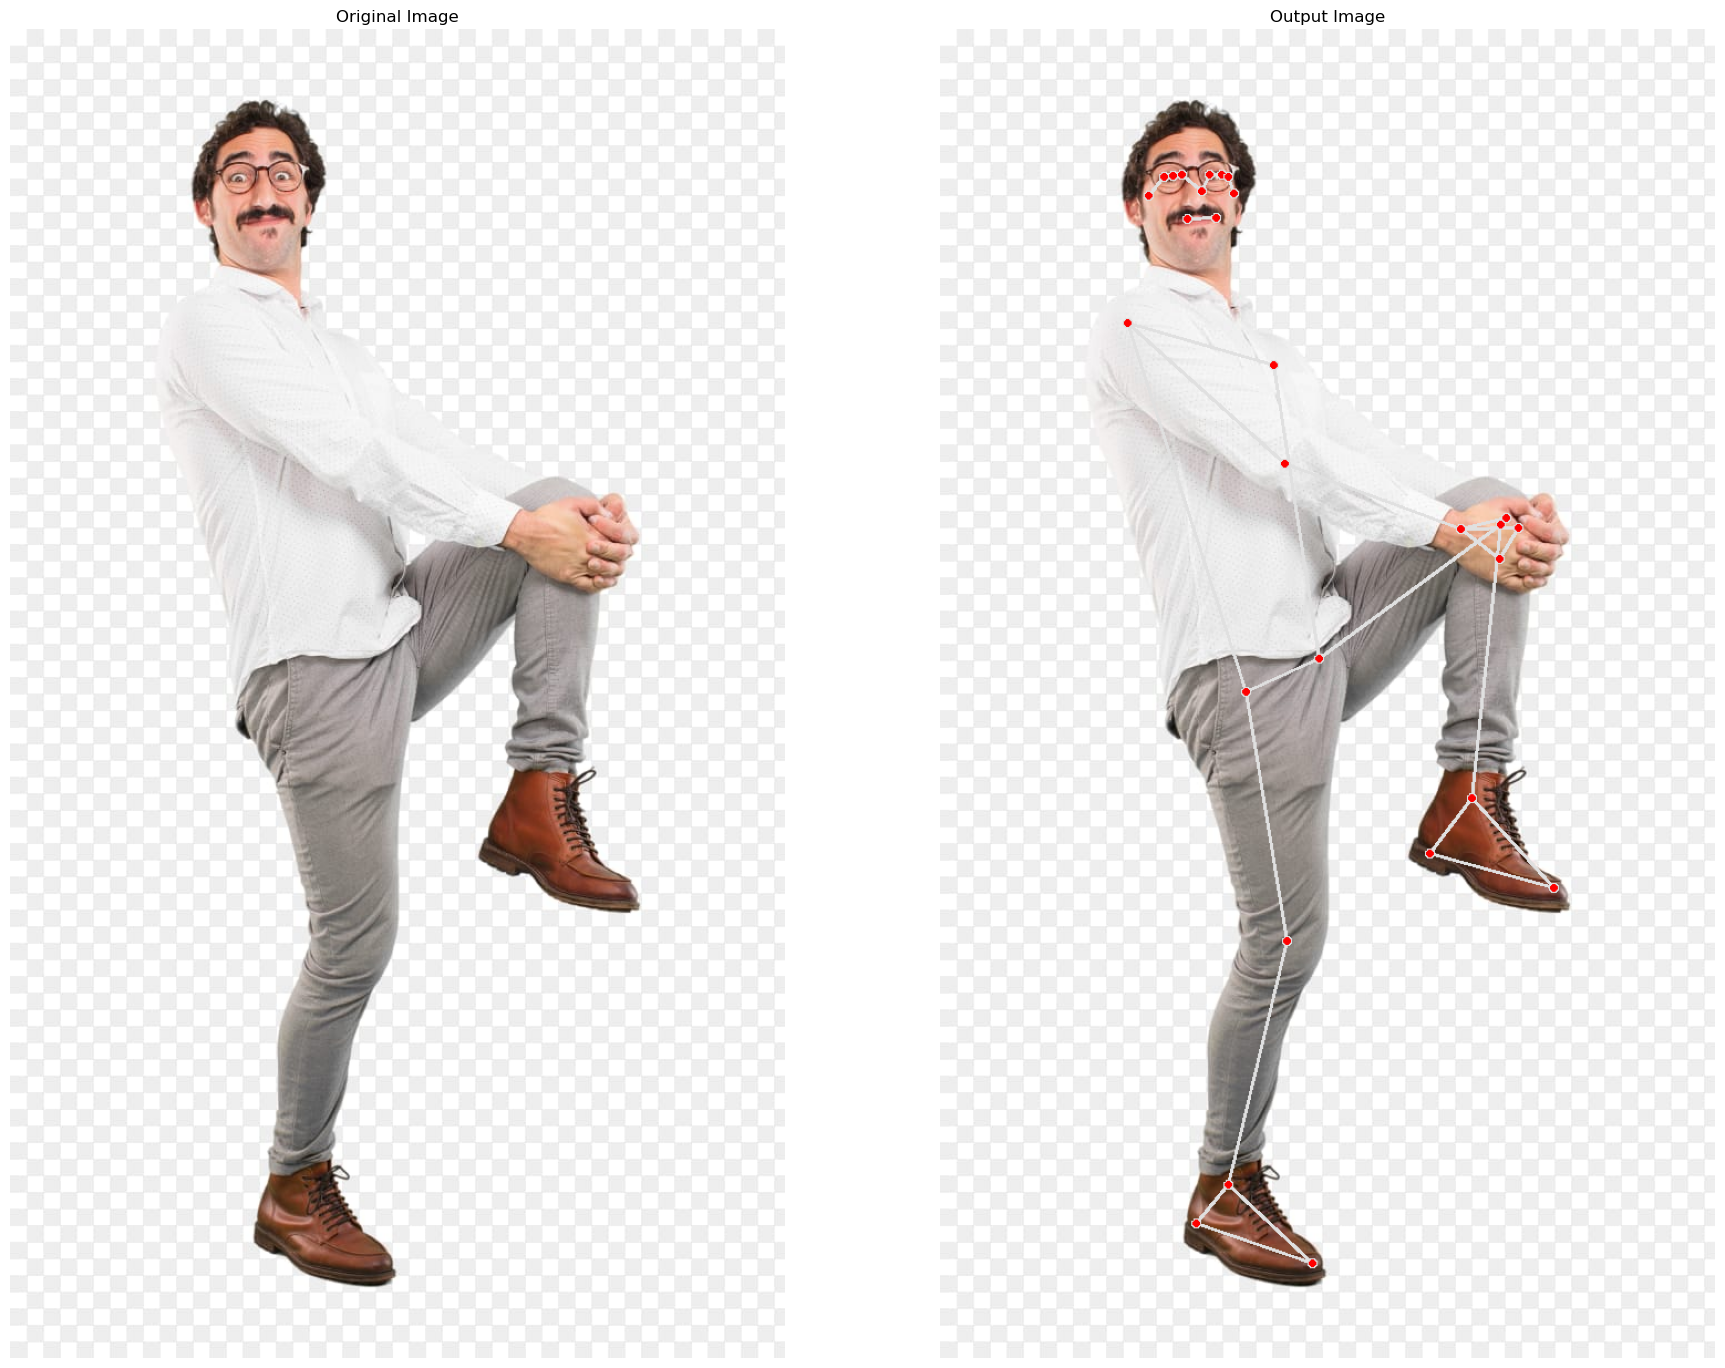

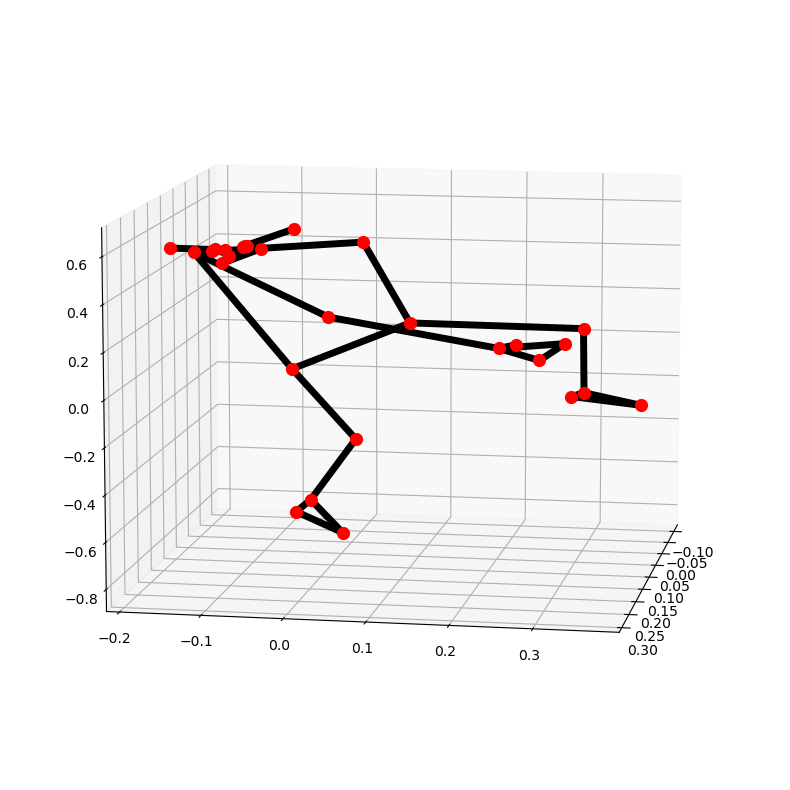

In [14]:
#Read another sample image and perform pose detection on it.
image = cv2.imread('photo_2.jpeg')
detectPose(image, pose, display=True)

In [15]:
import os
print(os.path.abspath("media/running.mp4"))


/Users/md.kaif/Desktop/Human Pose Estimation using Machine Learning (P4)/media/running.mp4


In [16]:
import cv2
import mediapipe as mp
import time  # Import time module

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Define the detectPose function
def detectPose(frame, pose_model, display=True):
    # Process the frame using the pose model
    results = pose_model.process(frame)

    # If landmarks are detected, draw them on the frame
    if results.pose_landmarks:
        mp.solutions.drawing_utils.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return frame, results

def setup_pose_function_for_webcam():
    # Initialize the VideoCapture object to read from the webcam (index 0 for default webcam)
    video = cv2.VideoCapture(0)

    # Check if the webcam is opened correctly
    if not video.isOpened():
        print("Error: Could not open webcam.")
        return

    # Initialize a variable to store the time of the previous frame
    time1 = 0

    # Iterate until the webcam feed is accessed successfully
    while video.isOpened():
        # Read a frame
        ok, frame = video.read()
        
        # Check if frame is not read properly
        if not ok:
            print("Error: Failed to read frame.")
            break
        
        # Flip the frame horizontally for natural (selfie-view) visualization
        frame = cv2.flip(frame, 1)
        
        # Get the width and height of the frame
        frame_height, frame_width, _ = frame.shape
        
        # Resize the frame while keeping the aspect ratio
        frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
        
        # Perform Pose landmark detection
        frame, _ = detectPose(frame, pose_video, display=False)
        
        # Set the time for this frame to the current time
        time2 = time.time()  # Use time.time() for current time
        
        # Check if the difference between the previous and this frame time > 0 to avoid division by zero
        if (time2 - time1) > 0:
            # Calculate the number of frames per second (FPS)
            frames_per_second = 1.0 / (time2 - time1)
            
            # Write the calculated number of frames per second on the frame
            cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
        
        # Update the previous frame time to this frame time
        time1 = time2
        
        # Display the frame with pose landmarks
        cv2.imshow('Pose Detection - Webcam', frame)
        
        # Wait until a key is pressed
        k = cv2.waitKey(1) & 0xFF
        
        # Check if 'ESC' key is pressed to exit
        if k == 27:
            break

    # Release the VideoCapture object
    video.release()

    # Close the OpenCV windows
    cv2.destroyAllWindows()

# Call the function to start pose detection on webcam
setup_pose_function_for_webcam()


I0000 00:00:1737973587.343145  435136 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1737973587.422979  435680 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737973587.439558  435681 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
2025-01-27 15:56:29.217 python[8409:435136] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-27 15:56:29.217 python[8409:435136] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [16]:
def calculateAngle(landmark1, landmark2, landmark3):
   
    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle


In [17]:
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [18]:

def classifyPose(landmarks, output_image, display=False):
   
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose' 
   
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                # Specify the label of the pose that is tree pose.
                label = 'T Pose'
                
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:

            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'

    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0, 255, 0)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label


In [19]:
def classifyPose(landmarks, output_image, display=False):
    '''
    Classifies yoga poses based on joint angles.
    '''
    # Initialize the label
    label = 'Unknown Pose'

    # Set default label color (Red)
    color = (0, 0, 255)
    
    # Calculate joint angles
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

    # Classify poses
    # Warrior II Pose
    if (165 < left_elbow_angle < 195 and 165 < right_elbow_angle < 195 and
        80 < left_shoulder_angle < 110 and 80 < right_shoulder_angle < 110 and
        ((165 < left_knee_angle < 195 and 90 < right_knee_angle < 120) or
         (165 < right_knee_angle < 195 and 90 < left_knee_angle < 120))):
        label = 'Warrior II Pose'

    # T Pose
    elif (165 < left_elbow_angle < 195 and 165 < right_elbow_angle < 195 and
          80 < left_shoulder_angle < 110 and 80 < right_shoulder_angle < 110 and
          165 < left_knee_angle < 195 and 165 < right_knee_angle < 195):
        label = 'T Pose'

    # Tree Pose
    elif ((165 < left_knee_angle < 195 or 165 < right_knee_angle < 195) and
          ((315 < left_knee_angle < 335 or 25 < right_knee_angle < 45))):
        label = 'Tree Pose'

    # Update label color to green if pose is recognized
    if label != 'Unknown Pose':
        color = (0, 255, 0)
    
    # Write the label on the output image
    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Display or return results
    if display:
        plt.figure(figsize=[10, 10])
        plt.imshow(output_image[:, :, ::-1])
        plt.title("Output Image")
        plt.axis('off')
    else:
        return output_image, label


In [20]:
image_path = 'media/warriorIIpose.jpeg'
image = cv2.imread("warrioryogapose.jpg")

# Check if the image is loaded correctly
if image is None:
    print(f"Error: Image at {image_path} cannot be opened or read.")
else:
    # Assuming detectPose and classifyPose are already defined
    output_image, landmarks = detectPose(image, pose, display=False)
    
    if landmarks:
        classifyPose(landmarks, output_image, display=True)
    else:
        print("No landmarks detected. Pose classification cannot proceed.")


Error: Image at media/warriorIIpose.jpeg cannot be opened or read.


[ WARN:0@13.687] global loadsave.cpp:268 findDecoder imread_('warrioryogapose.jpg'): can't open/read file: check file path/integrity


I0000 00:00:1737977054.254756  479336 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1737977054.336456  479802 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737977054.345966  479802 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


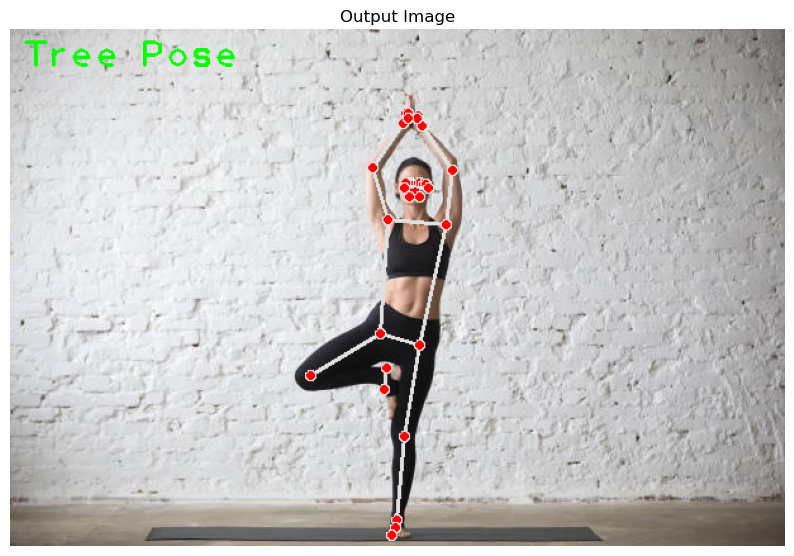

In [21]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=0)

# Read the image
image_path = 'media/treepose.jpg'
image = cv2.imread("treepose.jpeg")

# Check if image is loaded correctly
if image is None:
    print(f"Error: Image at {image_path} cannot be opened or read.")
else:
    # Perform pose detection
    output_image, landmarks = detectPose(image, pose, display=False)
    
    # Check if landmarks are detected
    if landmarks:
        classifyPose(landmarks, output_image, display=True)
    else:
        print("No landmarks detected. Pose classification cannot proceed.")


I0000 00:00:1737977054.851716  479336 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1737977054.936488  479811 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737977054.946868  479815 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


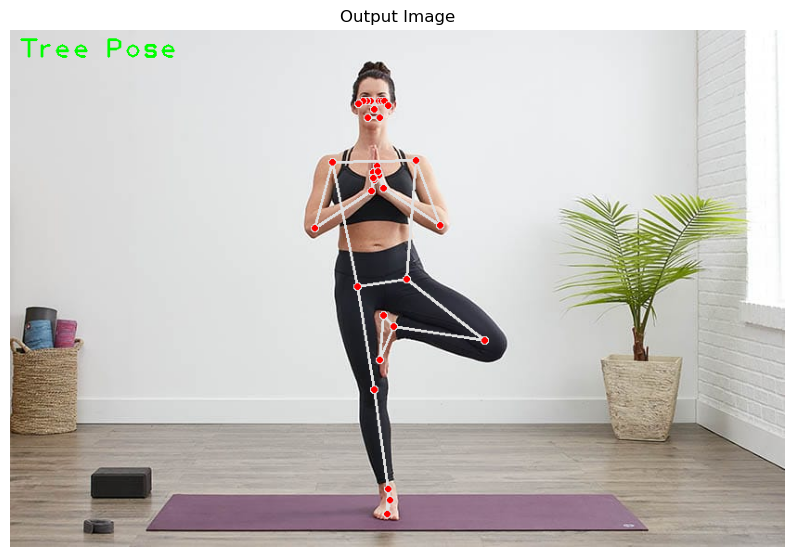

In [22]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=0)

# Read the image
image_path = 'media/treepose.jpg'
image = cv2.imread("treepose_1.jpeg")

# Check if image is loaded correctly
if image is None:
    print(f"Error: Image at {image_path} cannot be opened or read.")
else:
    # Perform pose detection
    output_image, landmarks = detectPose(image, pose, display=False)
    
    # Check if landmarks are detected
    if landmarks:
        classifyPose(landmarks, output_image, display=True)
    else:
        print("No landmarks detected. Pose classification cannot proceed.")


In [ ]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Function to classify pose based on detected landmarks
def classifyPose(landmarks, image):
    """
    Custom pose classification logic can go here.
    This example just identifies if the person is standing upright (T-pose logic can be added).
    """
    pose_class = "Unknown Pose"
    
    # Example: Check if shoulders and wrists are approximately aligned for T-pose
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]

    if abs(left_shoulder.y - left_wrist.y) < 0.1 and abs(right_shoulder.y - right_wrist.y) < 0.1:
        pose_class = "T-Pose"

    # Display the classification on the image
    cv2.putText(image, f"Pose: {pose_class}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Start webcam feed
cap = cv2.VideoCapture(0)  # Adjust to the correct camera index if necessary

# Check if webcam is opened
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            print("Error: Could not read frame.")
            break

        # Flip the image horizontally for a mirror effect
        frame = cv2.flip(frame, 1)

        # Convert the BGR frame to RGB for MediaPipe
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame to detect pose landmarks
        results = pose.process(frame_rgb)

        # Draw pose landmarks and classify the pose if detected
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            # Classify pose
            classifyPose(results.pose_landmarks.landmark, frame)

        # Display the frame
        cv2.imshow("Pose Classification", frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1737975867.527035  461721 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1737975867.598712  462761 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737975867.613413  462761 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
2025-01-27 16:34:28.181 python[9268:461721] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-27 16:34:28.181 python[9268:461721] +[IMKInputSession subclass]: chose IMKInputSession_Modern
